import packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as mtpl
import seaborn as sns

read data

In [2]:
data = pd.read_csv("/content/StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

## Checking the null values

In [5]:
null_values = data.isnull().sum()
print(null_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Checking all the columns present in the given data

In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Finding average score

In [7]:
data['average score'] = (data['math score'] + data['writing score'] + data['reading score'])/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Average score is decimal data so rounding it with 2

---



In [8]:
data['average score'] = np.round(data['average score'], 2)

In [9]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


1.

In [10]:
#Save the data into Clean data folder
data.to_csv("/content/CleanData_Student_Performance2.csv")

**Pie Plot**


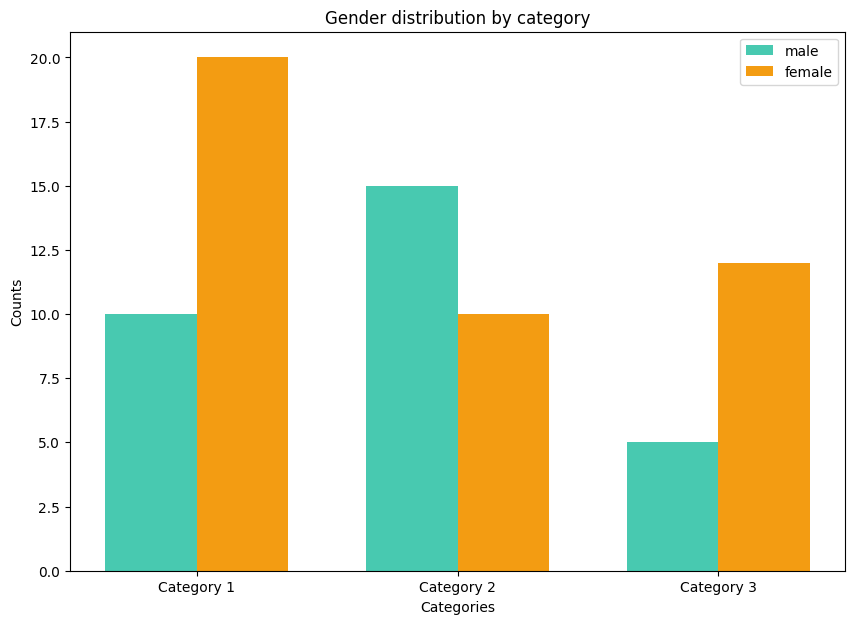

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['Category 1', 'Category 2', 'Category 3']
gender1_counts = np.array([10, 15, 5])  # Example counts for Gender 1
gender2_counts = np.array([20, 10, 12])  # Example counts for Gender 2

ind = np.arange(len(categories))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(ind - width/2, gender1_counts, width, label='male', color="#48C9B0")
rects2 = ax.bar(ind + width/2, gender2_counts, width, label='female', color="#F39C12")

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Gender distribution by category')
ax.set_xticks(ind)
ax.set_xticklabels(categories)
ax.legend()

plt.savefig('/content/Results/gender_distribution_stacked_bar.jpg')
plt.show()

<ipython-input-18-edd64ca50c9b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='gender', y='reading score', data=data,


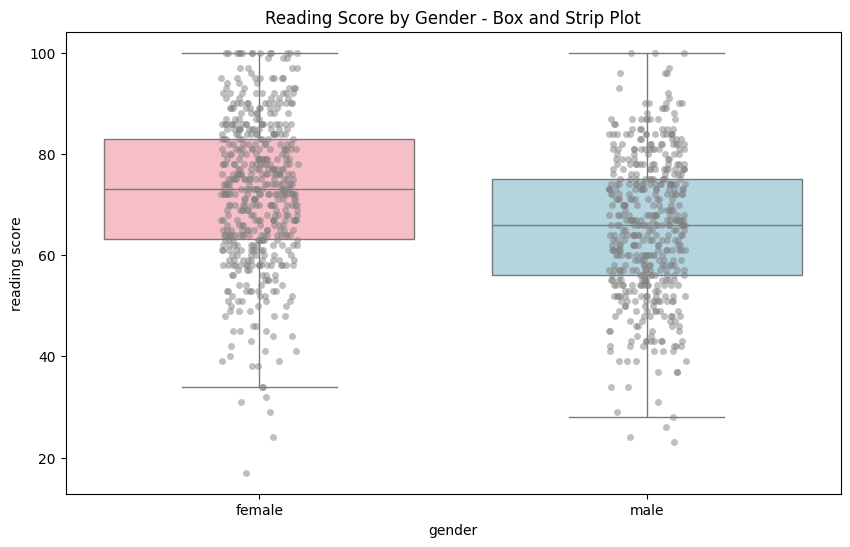

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# First, create the box plot
boxplot = sns.boxplot(x='gender', y='reading score', data=data,
                      palette={"male": "lightblue", "female": "lightpink"},
                      showfliers=False)  # Hide outliers to avoid overlap

# Then, overlay the strip plot on the same axes for individual data points
stripplot = sns.stripplot(x='gender', y='reading score', data=data,
                          color='gray', alpha=0.5)  # Adjust color and transparency

plt.title('Reading Score by Gender - Box and Strip Plot')

# To save the figure
plt.savefig('/content/Results/Reading_score_by_gender_box_strip.jpg')
plt.show()

**Race Plot**

In [19]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [20]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

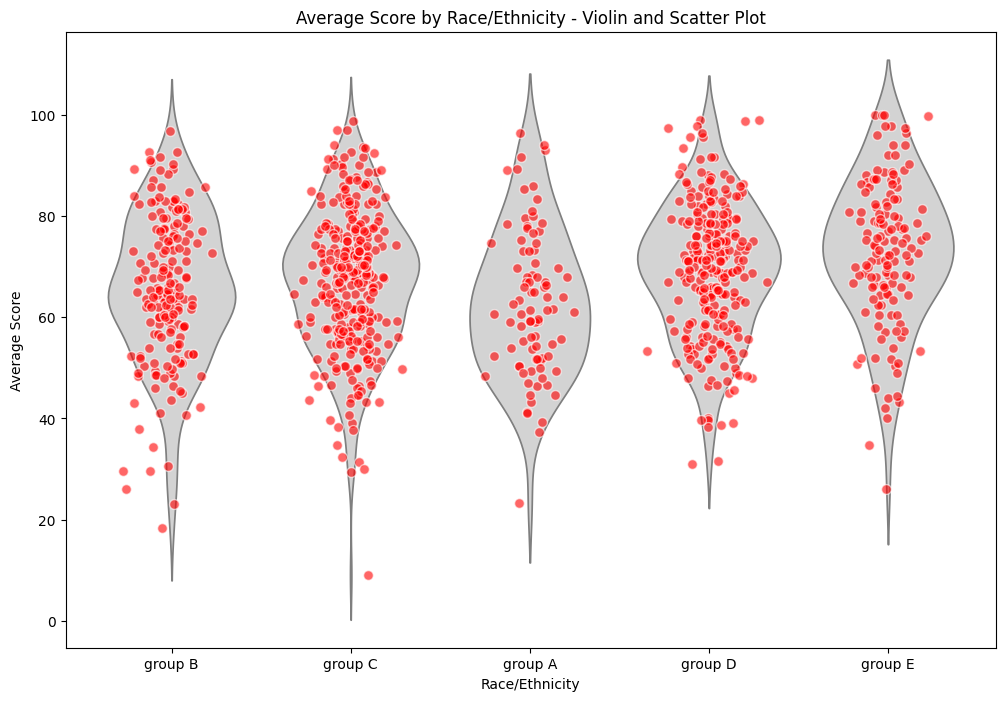

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))
# Create a violin plot to show the distribution of scores
violinplot = sns.violinplot(data=data, x='race/ethnicity', y='average score', color='lightgrey', inner=None)  # No inner annotations

# Overlay a scatter plot on the same axes for individual data points
# Generate jittered x values for clear visualization
race_ethnicity_categories = data['race/ethnicity'].unique()
x_values = {race: i for i, race in enumerate(race_ethnicity_categories)}
scatter_x = data['race/ethnicity'].map(x_values) + np.random.normal(0, 0.1, size=len(data))

scatterplot = plt.scatter(scatter_x, data['average score'], alpha=0.6, color='red', edgecolor='w', s=50)

plt.title('Average Score by Race/Ethnicity - Violin and Scatter Plot')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
# Adjust the x-ticks to show the race/ethnicity categories
plt.xticks(ticks=np.arange(len(race_ethnicity_categories)), labels=race_ethnicity_categories)

# Save the figure
plt.savefig('/content/Results/race_average_score_violin_scatter.jpg')
plt.show()

**Create a scatter plot comparing Average Score with Math, Writing, and Reading Scores**

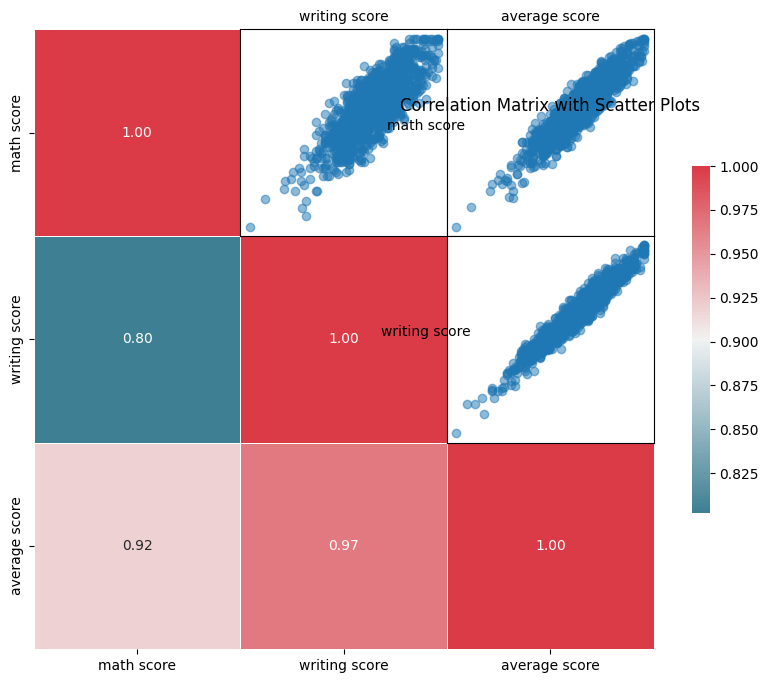

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'data' DataFrame has columns 'math score', 'writing score', 'average score'
# Calculating the correlation matrix
corr = data[['math score', 'writing score', 'average score']].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Add scatter plots on the upper triangle
for i, feature_i in enumerate(corr.columns):
    for j, feature_j in enumerate(corr.columns):
        if i < j:
            # Find positions
            x_start, x_width = ax.get_position().x0, ax.get_position().width
            y_start, y_height = ax.get_position().y0, ax.get_position().height
            cell_width = x_width / len(corr.columns)
            cell_height = y_height / len(corr.columns)

            # Calculate the positions of the scatter subplots
            x = x_start + j * cell_width
            y = y_start + (len(corr.columns) - 1 - i) * cell_height
            subax = f.add_axes([x, y, cell_width, cell_height])

            subax.scatter(data[feature_i], data[feature_j], alpha=0.5)
            subax.set_xticks([])
            subax.set_yticks([])

            if i == 0:
                subax.set_title(feature_j, fontsize=10)
            if j == len(corr.columns) - 1:
                subax.set_ylabel(feature_i, rotation=0, fontsize=10, labelpad=15)

plt.title('Correlation Matrix with Scatter Plots', pad=90)

# Adjusting the file save path to work in this environment
plt.savefig('/content/Results/Scores_Correlation_Matrix_with_Scatter.jpg')
plt.show()

<ipython-input-25-b09f957244bd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='gender', y='average score', kind="box", data=data, palette=['#3498db', '#9b59b6'], height=6, aspect=1.5)


<Figure size 1000x600 with 0 Axes>

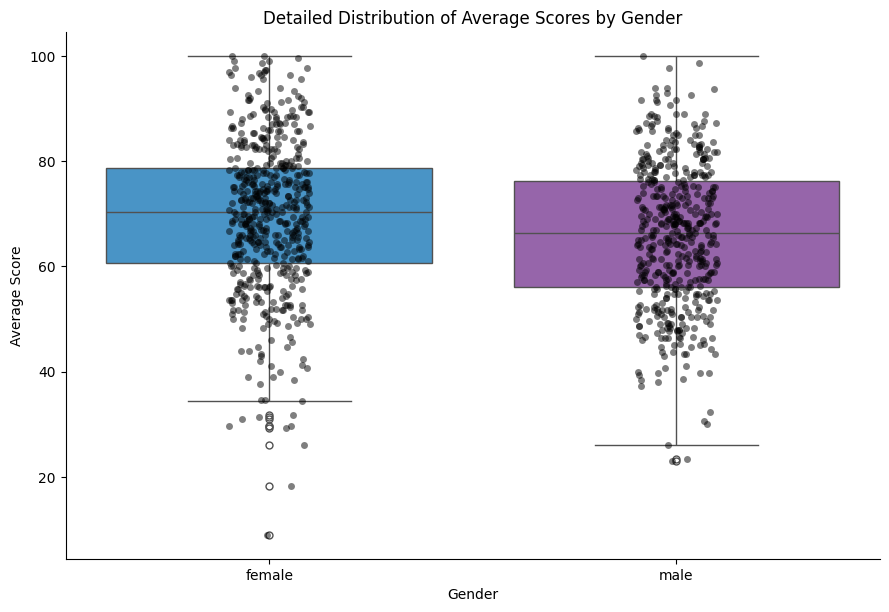

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Create a catplot that combines a box plot and a strip plot for detailed distribution visualization
sns.catplot(x='gender', y='average score', kind="box", data=data, palette=['#3498db', '#9b59b6'], height=6, aspect=1.5)
sns.stripplot(x='gender', y='average score', data=data, color="k", alpha=0.5, jitter=True)

plt.title('Detailed Distribution of Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')

# Adjust the file save path to work in this environment
plt.savefig('/content/Results/detailed_ave_score_by_gender.jpg')
plt.show()